In [1]:
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
print(tf.__version__)
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from tensorflow.python.framework import ops

1.12.0


In [3]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    ops.reset_default_graph()
    #return tf.compat.v1.Session()
    return tf.Session()

In [4]:
sess = tf_reset()

a = tf.constant(1.0)
b = tf.constant(2.0)

c = a + b


c_run = sess.run(c)

print('c = {0}'.format(c_run))

# with tf.compat.v1.Session() as ses:
#     # Build a graph.
#     a = tf.constant(5.0)
#     b = tf.constant(6.0)
#     c = a * b

#     # Evaluate the tensor `c`.
#     c_run = ses.run(c)
    
#     print('c = {0}'.format(c_run))

c = 3.0


In [5]:
sess = tf_reset()
#define  your inputs
a = tf.placeholder(dtype=tf.float32, shape=[1], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[1], name='b_placeholder')

# operation
c = a + b

c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [2.0], b: [4.0]})

print('c0 = {0}'.format(c0_run))
print('c1 = {0}'.format(c1_run))

c0 = [3.]
c1 = [6.]


In [6]:
sess = tf_reset()

a = tf.placeholder(dtype=tf.float32, shape=[None], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None], name='b_placehodler')


# operation
c = a + b

# get output
c0_run = sess.run(c, feed_dict={a: [1.0], b: [2.0]})
c1_run = sess.run(c, feed_dict={a: [1.0, 2.0], b: [2.0, 4.0]})

print(a)
print('a shape: {0}'.format(a.get_shape()))

print(b)
print('b shape: {0}'.format(b.get_shape()))

print('c0 = {0}'.format(c0_run))
print('c1 = {0}'.format(c1_run))

Tensor("a_placeholder:0", shape=(?,), dtype=float32)
a shape: (?,)
Tensor("b_placehodler:0", shape=(?,), dtype=float32)
b shape: (?,)
c0 = [3.]
c1 = [3. 6.]


In [7]:
sess = tf_reset()

a = tf.constant([[-1.], [-2.], [-3.]], dtype=tf.float32)
b = tf.constant([[-1., -2., -3.]], dtype=tf.float32)

a_run, b_run = sess.run([a, b])
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[-1. -2. -3.]]


In [8]:
c = b + b
c_run = sess.run(c)

print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[-1. -2. -3.]]
c:
[[-2. -4. -6.]]


In [9]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))

print('c_elementwise:\n{0}'.format(c_elementwise_run))
print('c_matmul:\n{0}'.format(c_matmul_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[-1. -2. -3.]]
c_elementwise:
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]
c_matmul:
[[14.]]


In [10]:
c0 = b + b
c1 = c0 + 1

c0_run, c1_run = sess.run([c0, c1])

print('b:\n{0}'.format(b_run))
print('c0:\n{0}'.format(c0_run))
print('c1:\n{0}'.format(c1_run))

b:
[[-1. -2. -3.]]
c0:
[[-2. -4. -6.]]
c1:
[[-1. -3. -5.]]


In [11]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[-1. -2. -3.]]
c:
-2.0


In [12]:
sess = tf_reset()

b = tf.constant([[1., 2., 3.]], dtype=tf.float32)

sess = tf.Session()

b_run = sess.run(b)
print('b:\n{0}'.format(b_run))

b:
[[1. 2. 3.]]


In [13]:
var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name='myvar',
                      shape=[1, 3],
                      dtype=tf.float32,
                      initializer=tf.constant_initializer(var_init_value))

print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


In [14]:
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


In [15]:
c = b + var
print(b)
print(var)
print(c)

Tensor("Const:0", shape=(1, 3), dtype=float32)
<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
Tensor("add:0", shape=(1, 3), dtype=float32)


In [16]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [17]:
c_run = sess.run(c)

print('b:\n{0}'.format(b_run))
print('var:\n{0}'.format(var_init_value))
print('c:\n{0}'.format(c_run))

b:
[[1. 2. 3.]]
var:
[[2.0, 4.0, 6.0]]
c:
[[3. 6. 9.]]


Training Simple Network

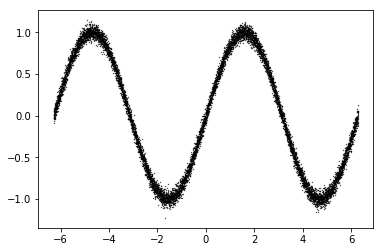

In [27]:
#generate data
inputs=np.linspace(-2*np.pi,2*np.pi,10000)[:,None]
outputs=np.sin(inputs)+0.05*np.random.normal(size=[len(inputs),1])
plt.scatter(inputs[:,0] ,outputs[:,0],s=0.1,color='k',marker='o')

In [19]:
print(inputs.shape)
print(outputs.shape)

(10000, 1)
(10000, 1)


In [23]:
sess = tf_reset()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    #create variables
    w0 = tf.get_variable(name='w0', shape=[1, 20],  initializer=tf.contrib.layers.xavier_initializer())
    w1 = tf.get_variable(name='w1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    w2 = tf.get_variable(name='w2', shape=[20, 1],  initializer=tf.contrib.layers.xavier_initializer())
    
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))
    b2 = tf.get_variable(name='b2', shape=[1],  initializer=tf.constant_initializer(0.))
    
    weights = [w0, w1, w2]
    biases  = [b0, b1, b2]
    activation = [tf.nn.relu, tf.nn.relu, None]
    
    # Create computation graph
    layer = input_ph
    
    for W, b, activation in zip(weights, biases, activation):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
#             print(activation)
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred

input_ph, output_ph, output_pred = create_model()

#create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [29]:
# initialize variables
sess.run(tf.global_variables_initializer())
# create saver to save model variables
saver = tf.train.Saver()

model_path = '/home/cstx2/.tensorflow/sinwave'
# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    #run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph: input_batch, output_ph: output_batch})
    
    # print the mse every so often
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse_run))
        saver.save(sess, model_path)

0000 mse: 0.347
1000 mse: 0.065
2000 mse: 0.073
3000 mse: 0.027
4000 mse: 0.033
5000 mse: 0.018
6000 mse: 0.022
7000 mse: 0.008
8000 mse: 0.003
9000 mse: 0.004


In [ ]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

#restore the saved model
saver = tf.train.Saver()
saver.restore(sess, model_path)

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})

plt.scatter(inputs[:,0] ,outputs[:,0],        s=0.1,color='k',marker='o', s=0.1)
plt.scatter(inputs[:,0] ,output_pred_run[:,0],s=0.1,color='r',marker='o', s=0.1)

Tips and tricks

In [32]:
#check your dimensions
a = tf.constant(np.random.random((4, 1)))
b = tf.constant(np.random.random((1, 4)))

c = a * b
assert c.get_shape() == (4, 4)

In [33]:
# check what variable been created
sess = tf_reset()
a = tf.get_variable('var1', shape=[4, 6])
b = tf.get_variable('var2', shape=[2, 7])

for var in tf.global_variables():
    print(var.name)

var1:0
var2:0


In [34]:
# tensorflow API help
help(tf.reduce_mean)

Help on function reduce_mean in module tensorflow.python.ops.math_ops:

reduce_mean(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
    Computes the mean of elements across dimensions of a tensor. (deprecated arguments)
    
    SOME ARGUMENTS ARE DEPRECATED. They will be removed in a future version.
    Instructions for updating:
    keep_dims is deprecated, use keepdims instead
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keepdims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` is None, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1., 1.], [2., 2.]])
    tf.reduce_mean(x)  # 1.5
    tf.reduce_mean(x, 0)  # [1.5, 1.5]
    tf.reduce_mean(x, 1)  # [1.,  2.]
    ```
    
    Args:
      

In [35]:
# built in layers
help(tf.contrib.layers.fully_connected)

Help on function fully_connected in module tensorflow.contrib.layers.python.layers.layers:

fully_connected(inputs, num_outputs, activation_fn=<function relu at 0x7f8a111d90>, normalizer_fn=None, normalizer_params=None, weights_initializer=<function variance_scaling_initializer.<locals>._initializer at 0x7f2000b1e0>, weights_regularizer=None, biases_initializer=<tensorflow.python.ops.init_ops.Zeros object at 0x7f20009128>, biases_regularizer=None, reuse=None, variables_collections=None, outputs_collections=None, trainable=True, scope=None)
    Adds a fully connected layer.
    
    `fully_connected` creates a variable called `weights`, representing a fully
    connected weight matrix, which is multiplied by the `inputs` to produce a
    `Tensor` of hidden units. If a `normalizer_fn` is provided (such as
    `batch_norm`), it is then applied. Otherwise, if `normalizer_fn` is
    None and a `biases_initializer` is provided then a `biases` variable would be
    created and added the hidde

In [39]:
# Variable scope
sess = tf_reset()

with tf.variable_scope('layer_0'):
    w0 = tf.get_variable(name='w0', shape=[1, 20],  initializer=tf.contrib.layers.xavier_initializer())
    b0 = tf.get_variable(name='b0', shape=[20], initializer=tf.constant_initializer(0.))
    
with tf.variable_scope('layer_1'):
    w1 = tf.get_variable(name='w1', shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable(name='b1', shape=[20], initializer=tf.constant_initializer(0.))

with tf.variable_scope('layer_2'):
    w2 = tf.get_variable(name='w2', shape=[20, 1],  initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable(name='b2', shape=[1],  initializer=tf.constant_initializer(0.))

var_names = sorted([v.name for v in tf.global_variables()])
print('\n'.join(var_names))

layer_0/b0:0
layer_0/w0:0
layer_1/b1:0
layer_1/w1:0
layer_2/b2:0
layer_2/w2:0


In [41]:
# Set Which GPU and memory

gpu_device = 0
gpu_frac = 0.5

#make only one of the GPUs visible
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_device)

# only user part of GPU memory
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_frac)
config = tf.ConfigProto(gpu_options=gpu_options)

#create the session
tf_sess = tf.Session(graph=tf.Graph(), config=config)